In [1]:
import os 
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Plot AUC-ROC curve of COVID-GRAM predicitons

- only for patients which overlap with our DiscoveryValidation subset

In [2]:
df_gram = pd.read_csv("../../results/prediction/COVID_GRAM/covid_gram_probas.csv")
df_gram

,sample_id,disease_severity,gramScore_probability
0,CVD-0112,1.0,0.852316
1,CVD-0016,1.0,0.382418
2,CVD-0044,1.0,0.699122
3,CVD-0023,1.0,0.319451
4,CVD-0098,1.0,0.305188
...,...,...,...
150,CVD-0067,1.0,0.633476
151,CVD-0199,1.0,0.708684
152,CVD-0024,0.0,0.064034
153,CVD-0034,1.0,0.668152


In [3]:
####  GET ROC CURVE
y_true = df_gram["disease_severity"]
y_proba = df_gram["gramScore_probability"]
fpr, tpr, thresholds = roc_curve(y_true, y_proba, pos_label=1)
roc_auc = auc(fpr, tpr)

''' save in pickle '''
pickle.dump([fpr, tpr], open(os.path.join("../../results/prediction/COVID_GRAM/fpr_tpr_auc.p"), "wb"))

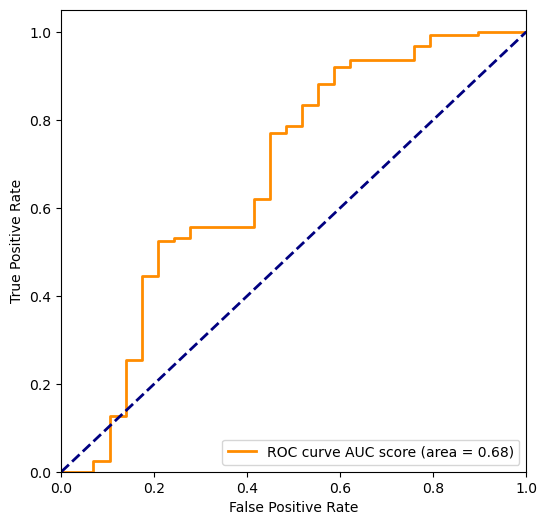

In [4]:
plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label=f'ROC curve AUC score (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# Confusion matrix

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

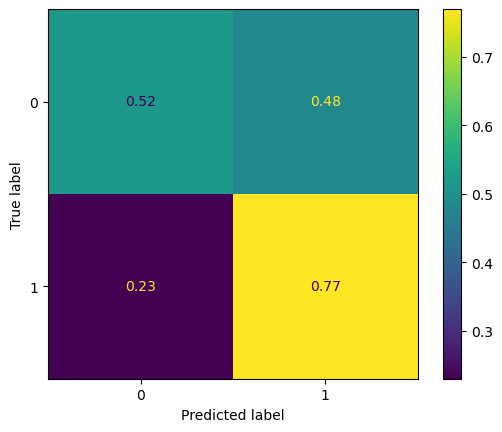

In [22]:
y_true = df_gram["disease_severity"]
y_proba = df_gram["gramScore_probability"]

### Threshold as in MDCalc
y_pred = y_proba.copy()
y_pred[y_proba >= 0.404] = 1
y_pred[y_proba < 0.404] = 0

''' 
Also overestimates the number of severe cases, similar to what Spanish validation reports?
- if severeCase (lower row): 77% correct, 23% missed
- if non-severeCase (upper row): 52% correct, 48% missed
'''
ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred, normalize="true")).plot()